In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

In [2]:
df = pd.read_csv('/Users/natalagrunskaa/Desktop/AirlineReviews.csv')
df.columns = df.columns.to_series().apply(lambda x: x.strip())
df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


There are 288235 missing values.
There are 0 duplicate rows.


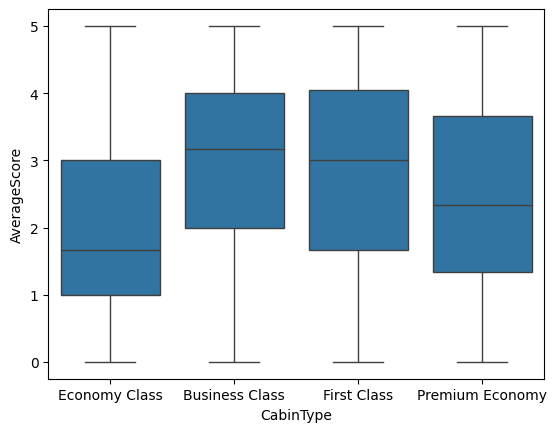

In [3]:
df['AverageScore'] = df[['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating']].mean(axis= 1)    
print(f"There are {df.isna().sum().sum()} missing values.")
print(f"There are {df.duplicated().sum()} duplicate rows.")
sns.boxplot(data=df, x='CabinType', y='AverageScore')
plt.show()


In [4]:
df['TripVerified'] = df['TripVerified'].replace('NotVerified', 'Not Verified')
df['TripVerified'] = df['TripVerified'].replace('Not Verified,Not Verified', 'Not Verified')
df['TripVerified'] = df['TripVerified'].replace('Trip Verified,Trip Verified', 'Trip Verified')
df['TripVerified'] = df['TripVerified'].replace('Chicago to Colorado Springs. Not Verified', 'Not Verified')
df['TripVerified'] = df['TripVerified'].replace(['Trip Verified', 'Not Verified'],[1,0])
df['Recommended']=df['Recommended'].replace(["yes","no"],[1,0])
df['MonthYearPublished'] = pd.to_datetime(df['DatePub'],format='mixed').dt.to_period('M')
df['MonthYearPublished'] = df['MonthYearPublished'].dt.year.astype(str) + df['MonthYearPublished'].dt.month.astype(str).str.zfill(2)
df['MonthYearPublished'] = pd.to_numeric(df['MonthYearPublished'], errors='coerce')
print(df['MonthYearPublished'])
df=df.dropna(axis=0, how='any', subset=None, inplace=False) 
pd.options.display.float_format ='{:,.4f}'.format
df =df.drop(columns=['Aircraft','Slug','OriginCountry','Route','TravelType','Title','unique_id','DateFlown','DatePub'])

df['AirCompanyUsage'] = df.groupby('AirlineName')['AirlineName'].transform('count')
df['ReviewLen'] = df['Review'].apply(lambda x: len(str(x).split()))
df['AverageScore'] = df[['EntertainmentRating', 'FoodRating', 'GroundServiceRating', 'SeatComfortRating', 'ServiceRating', 'ValueRating']].mean(axis= 1 )
df['AirlineNameCode'] = pd.factorize(df.AirlineName)[0]
df['CabinTypeCode'] = pd.factorize(df.CabinType)[0]

df = df.drop(columns=['AirlineName','CabinType','Review'])
df['TripVerified'] = df['TripVerified'].astype(int)
df.info()


0         201911
1         201906
2         201906
3         201012
4         201011
           ...  
129450    201007
129451    201006
129452    201006
129453    201006
129454    201006
Name: MonthYearPublished, Length: 129455, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 18619 entries, 1 to 128946
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EntertainmentRating  18619 non-null  int64  
 1   FoodRating           18619 non-null  int64  
 2   GroundServiceRating  18619 non-null  int64  
 3   OverallScore         18619 non-null  float64
 4   Recommended          18619 non-null  int64  
 5   SeatComfortRating    18619 non-null  int64  
 6   ServiceRating        18619 non-null  int64  
 7   TripVerified         18619 non-null  int64  
 8   ValueRating          18619 non-null  int64  
 9   WifiRating           18619 non-null  int64  
 10  AverageScore         18619 non-null  float64
 11

In [5]:
df = df.dropna()

In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Создаем объект StandardScaler
scaler = StandardScaler()

# Выбираем столбцы, которые нужно стандартизировать
columns_to_scale = df.columns
columns_to_scale = df.drop('MonthYearPublished', axis=1).columns
# Применяем стандартизацию на выбранных столбцах
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
to_norm_cols = df.columns
# for col in to_norm_cols:
#     df[col] = preprocessing.normalize([df[col]])[0]
# Выводим стандартизированные данные
df.head()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,TripVerified,ValueRating,WifiRating,AverageScore,MonthYearPublished,AirCompanyUsage,ReviewLen,AirlineNameCode,CabinTypeCode
1,-1.0293,-0.8676,-1.2905,-1.3194,-1.0847,-0.7553,-0.8876,0.4105,-0.7288,-0.5690,-1.1648,201906,-1.2042,-0.0563,-1.8695,-0.5483
2,-1.0293,-0.8676,-1.2905,-1.3194,-1.0847,-0.7553,-1.5220,0.4105,-0.7288,-0.5690,-1.2914,201906,-1.2042,-0.7028,-1.8695,-0.5483
7,-1.0293,-1.4299,1.2071,1.0253,0.9219,0.6043,0.3813,0.4105,0.5387,-0.5690,-0.0259,201905,-1.2042,-0.9786,-1.8613,-0.5483
8,-1.0293,-1.4299,1.2071,1.0253,0.9219,0.6043,1.0158,0.4105,0.5387,-0.5690,0.1006,201905,-1.2042,-0.9976,-1.8613,-0.5483
12,-0.4974,-0.8676,-1.2905,-1.3194,-1.0847,-1.4351,-1.5220,0.4105,-1.3625,0.0900,-1.4179,201909,-1.1898,-0.1799,-1.8532,-0.5483


In [7]:
# def plot_dependences(df, column):
#     # Создать подграфики в виде сетки
#     fig, axes = plt.subplots(len(df.columns)-1, 1, figsize=(4, len(df.columns)*4), squeeze=False)
    
#     # Проход по всем остальным столбцам
#     for i, col in enumerate(df.columns.drop(column)):
#         # Построить график зависимости столбца column от столбца col
#         axes[i, 0].plot(df[col], df[column], 'o')
#         axes[i, 0].set_xlabel(col)
#         axes[i, 0].set_ylabel(column)
    
#     plt.tight_layout()
#     plt.show()

# # likely_working_columns = ['EntertainmentRating','FoodRating','GroundServiceRating','AirCompanyUsage','ReviewLen','CabinTypeCode','AverageScore']
# likely_working_columns = df.columns
# for column in likely_working_columns:
#     plot_dependences(df, column)

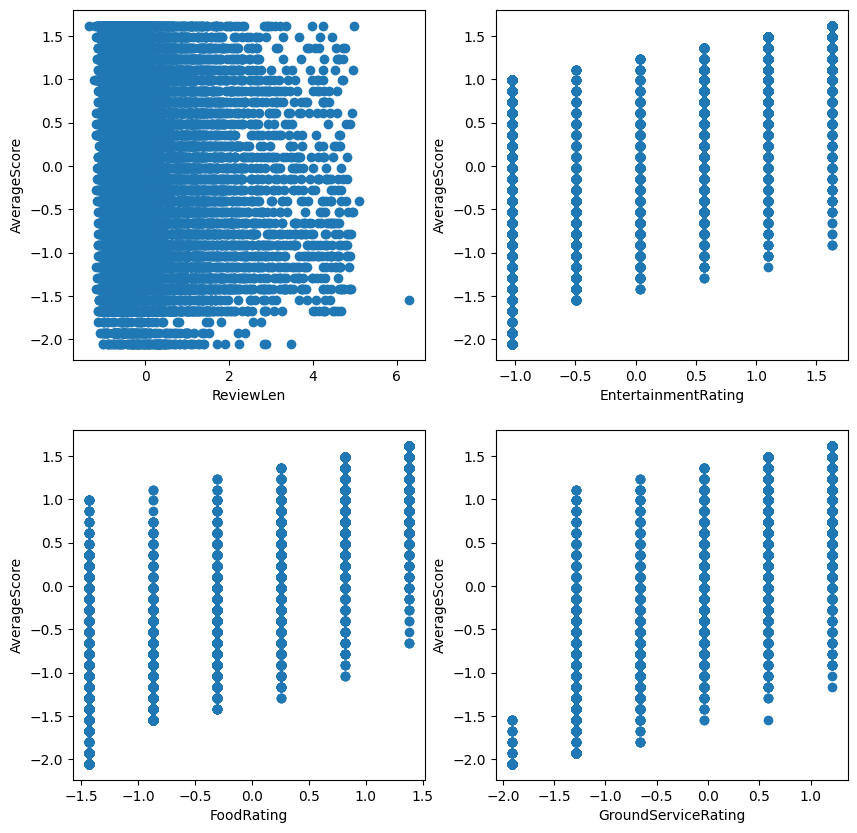

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))


ax[0][0].scatter(df["ReviewLen"], df["AverageScore"])
ax[0][0].set_xlabel("ReviewLen")
ax[0][0].set_ylabel("AverageScore")


ax[0][1].scatter(df["EntertainmentRating"], df["AverageScore"])
ax[0][1].set_xlabel("EntertainmentRating")
ax[0][1].set_ylabel("AverageScore")


ax[1][0].scatter(df["FoodRating"], df["AverageScore"])
ax[1][0].set_xlabel("FoodRating")
ax[1][0].set_ylabel("AverageScore")


ax[1][1].scatter(df["GroundServiceRating"], df["AverageScore"])
ax[1][1].set_xlabel("GroundServiceRating")
ax[1][1].set_ylabel("AverageScore")

plt.show()

In [9]:
features = ['EntertainmentRating', 'FoodRating', 'ServiceRating', 'GroundServiceRating', 'SeatComfortRating', 'ReviewLen']
target = 'AverageScore'
X = df[features]
y = df[target]


In [10]:
from sklearn.model_selection import train_test_split
import pandas as pd


# Разделяем данные на признаки (X) и целевую переменную (y)
X = df[["EntertainmentRating"]]
y = df["AverageScore"]

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [11]:
x =X.to_numpy()
y = y.to_numpy()

# Создаем объект модели линейной регрессии
model = LinearRegression(fit_intercept=True)
# Обучаем модель
model.fit(x.reshape(-1, 1), y)

LinearRegression()

In [12]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.414434272860867


In [13]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Предсказание результата
# y_pred = model.predict(x)

# # Строим точечный график предсказанных значений
# plt.plot(y_test, y_pred, '.')

# # Задаем линию, с которой должны совпадать предсказанные значения
# x_line = np.linspace(min(y_test), max(y_test), 100)
# y_line = x_line
# plt.plot(x_line, y_line)

# # Отображение графика
# plt.show()

Среднеквадратичная ошибка: 0.5915988452228688


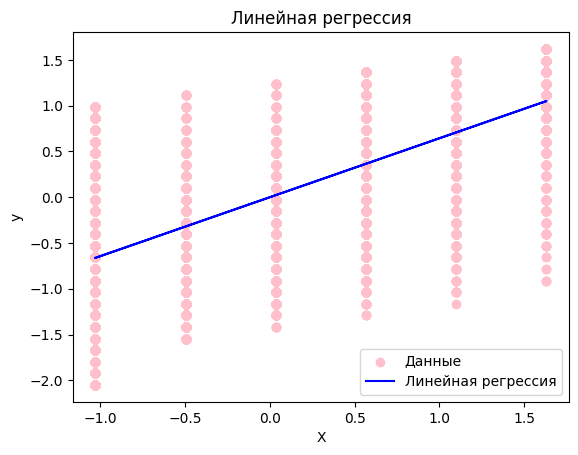

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[["EntertainmentRating"]]
y = df["AverageScore"]

# Разбиваем датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем объект линейной регрессии
regressor = LinearRegression()

# Обучаем модель на обучающей выборке
regressor.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = regressor.predict(X_test)

# Вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

print("Среднеквадратичная ошибка:", mse)


egressor = LinearRegression()

# Обучаем модель на всех данных
regressor.fit(X, y)

# Предсказываем значения для всех данных
y_pred = regressor.predict(X)

# Показательный график
plt.scatter(X, y, color='pink', label='Данные')
plt.plot(X, y_pred, color='blue', label='Линейная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

In [15]:
import pandas as pd
from numpy import arange
from sklearn. linear_model import LassoCV
from sklearn. model_selection import RepeatedKFold

Веса признаков: [0.5426394]


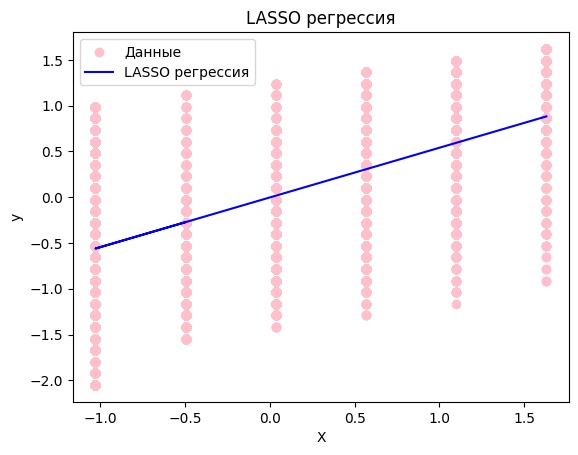

Среднеквадратичная ошибка: 0.6027163748303516


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Создаем датасет с признаками X и целевой переменной y
X = df[["EntertainmentRating"]]
y = df["AverageScore"]

# Разбиваем датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем объект LASSO регрессии
lasso = Lasso(alpha=0.1)

# Обучаем модель на обучающей выборке
lasso.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = lasso.predict(X_test)

# Вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

# Выводим веса признаков
print("Веса признаков:", lasso.coef_)

# Показательный график
plt.scatter(X, y, color='pink', label='Данные')
plt.plot(X_test, y_pred, color='blue', label='LASSO регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.title('LASSO регрессия')
plt.legend()
plt.show()

print("Среднеквадратичная ошибка:", mse)

Веса признаков: [0.64267496]


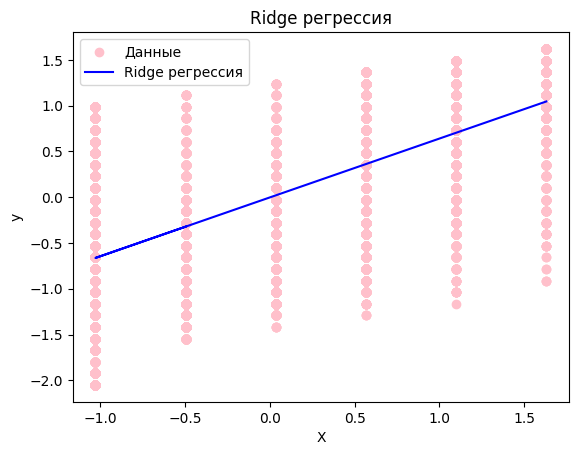

Среднеквадратичная ошибка: 0.5915988924098707


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X = df[["EntertainmentRating"]]
y = df["AverageScore"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем объект Ridge регрессии
ridge = Ridge(alpha=0.1)

# Обучаем модель на обучающей выборке
ridge.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = ridge.predict(X_test)

# Вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

# Выводим веса признаков
print("Веса признаков:", ridge.coef_)

# Показательный график
plt.scatter(X, y, color='pink', label='Данные')
plt.plot(X_test, y_pred, color='blue', label='Ridge регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge регрессия')
plt.legend()
plt.show()

print("Среднеквадратичная ошибка:", mse)

Среднеквадратичная ошибка: 0.9676008308808283


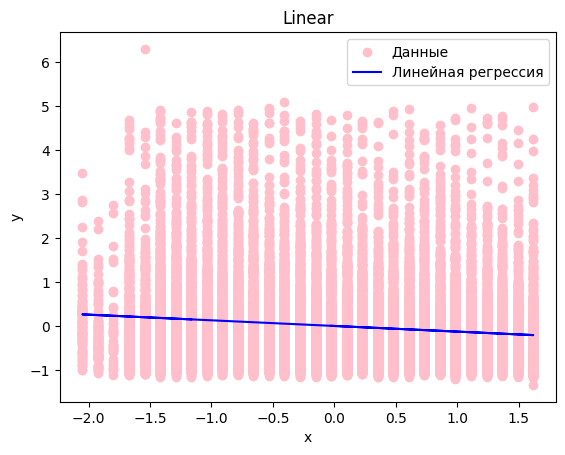

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X = df[["AverageScore"]]
y = df["ReviewLen"]

# Разбиваем датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем объект линейной регрессии
regressor = LinearRegression()

# Обучаем модель на обучающей выборке
regressor.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = regressor.predict(X_test)

# Вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

print("Среднеквадратичная ошибка:", mse)


egressor = LinearRegression()

# Обучаем модель на всех данных
regressor.fit(X, y)

# Предсказываем значения для всех данных
y_pred = regressor.predict(X)

# Показательный график
plt.scatter(X, y, color='pink', label='Данные')
plt.plot(X, y_pred, color='blue', label='Линейная регрессия')
plt.title('Linear')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Веса признаков: [-0.03246963]
Среднеквадратичная ошибка: 0.973330843896972


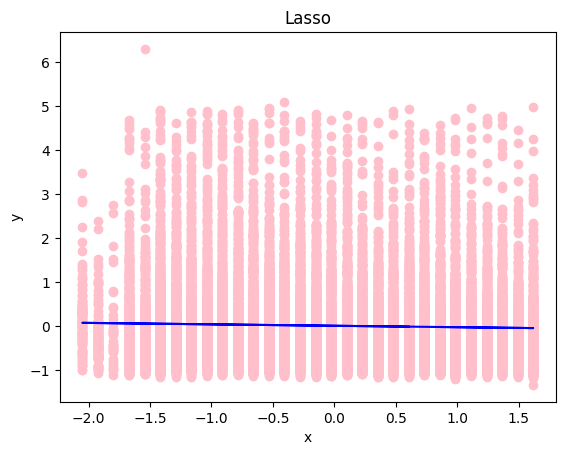

In [19]:
lasso = Lasso(alpha=0.1)

# Обучаем модель на обучающей выборке
lasso.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = lasso.predict(X_test)

# Вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

# Выводим веса признаков
print("Веса признаков:", lasso.coef_)

# Показательный график
plt.scatter(X, y, color='pink', label='Данные')
plt.plot(X_test, y_pred, color='blue', label='LASSO регрессия')
plt.title('Lasso')
plt.xlabel('x')
plt.ylabel('y')


print("Среднеквадратичная ошибка:", mse)

Веса признаков: [-0.13277595]


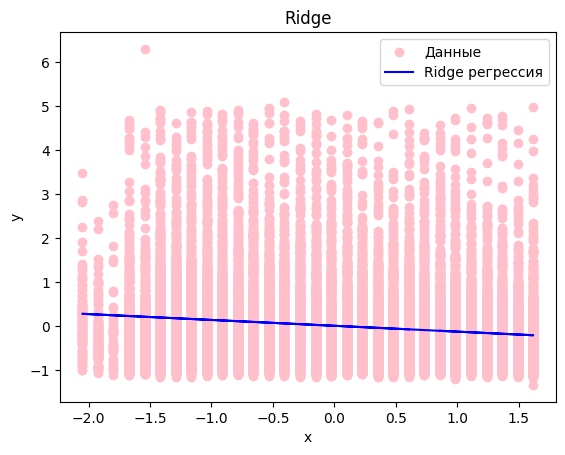

Среднеквадратичная ошибка: 0.9676007911636955


In [20]:
ridge = Ridge(alpha=0.1)

# Обучаем модель на обучающей выборке
ridge.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = ridge.predict(X_test)

# Вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

# Выводим веса признаков
print("Веса признаков:", ridge.coef_)

# Показательный график
plt.scatter(X, y, color='pink', label='Данные')
plt.plot(X_test, y_pred, color='blue', label='Ridge регрессия')
plt.title('Ridge')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("Среднеквадратичная ошибка:", mse)

In [21]:

plt.tight_layout()

# Отображение графиков
plt.show()

<Figure size 640x480 with 0 Axes>

Среднеквадратичная ошибка: 0.9907446149964544


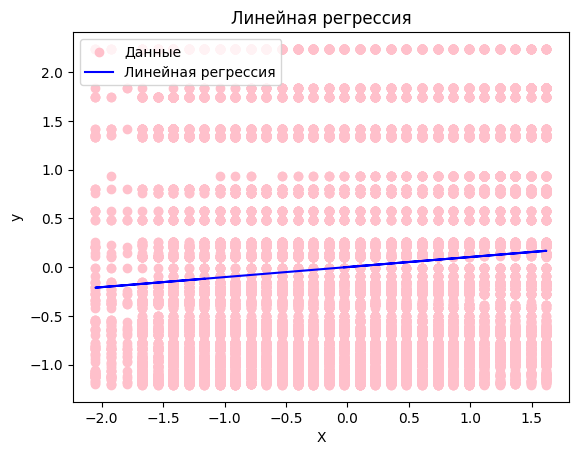

In [22]:
X = df[["AverageScore"]]
y = df["AirCompanyUsage"]

# Разбиваем датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем объект линейной регрессии
regressor = LinearRegression()

# Обучаем модель на обучающей выборке
regressor.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке
y_pred = regressor.predict(X_test)

# Вычисляем среднеквадратичную ошибку
mse = mean_squared_error(y_test, y_pred)

print("Среднеквадратичная ошибка:", mse)


egressor = LinearRegression()

# Обучаем модель на всех данных
regressor.fit(X, y)

# Предсказываем значения для всех данных
y_pred = regressor.predict(X)

# Показательный график
plt.scatter(X, y, color='pink', label='Данные')
plt.plot(X, y_pred, color='blue', label='Линейная регрессия')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.legend()
plt.show()

In [49]:
features = ['EntertainmentRating', 'FoodRating', 'ServiceRating', 'GroundServiceRating', 'SeatComfortRating', 'ReviewLen']
target = 'ReviewLen'

In [50]:
# features = ['EntertainmentRating']
# target = 'AverageScore'

In [51]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=45)

In [52]:
model = LinearRegression()

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
parameters = {'fit_intercept': [True, False], 'n_jobs': [ -1,1, None], 'copy_X': [True, False]}
grid_search = GridSearchCV(model, parameters, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 1, None]},
             scoring='r2')

In [54]:
# Получение лучших параметров
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)

Лучшие параметры: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}


LinearRegression(n_jobs=-1)

In [55]:
# Предсказание на тестовом наборе
y_pred = best_model.predict(X_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)
print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Объясненная дисперсия: {explained_var}")

Среднеквадратичная ошибка (MSE): 1.0261666203738983e-30
Коэффициент детерминации (R^2): 1.0
Средняя абсолютная ошибка (MAE): 7.680896949245576e-16
Объясненная дисперсия: 1.0


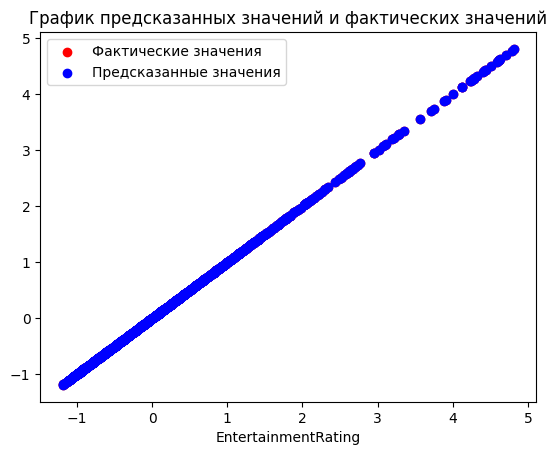

In [57]:
plt.scatter(X_test['ReviewLen'], y_test, color='red', label='Фактические значения')
plt.scatter(X_test['ReviewLen'], y_pred, color='blue', label='Предсказанные значения')

plt.xlabel('EntertainmentRating')

plt.title('График предсказанных значений и фактических значений')
plt.legend()
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = Lasso()


In [59]:
# Определение параметров для подбора
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
              'fit_intercept': [True, False],
              'copy_X': [True, False]}

In [60]:
grid_search = GridSearchCV(model, parameters, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [61]:
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'alpha': 0.001, 'copy_X': True, 'fit_intercept': False}


In [62]:
best_model = Lasso(**best_params)
best_model.fit(X_train, y_train)

Lasso(alpha=0.001, fit_intercept=False)

In [63]:
y_pred = best_model.predict(X_test)

In [64]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Объясненная дисперсия: {explained_var}")

Среднеквадратичная ошибка (MSE): 9.980777425718063e-07
Коэффициент детерминации (R^2): 0.9999990008435131
Средняя абсолютная ошибка (MAE): 0.0007371353581159209
Объясненная дисперсия: 0.9999990008873384


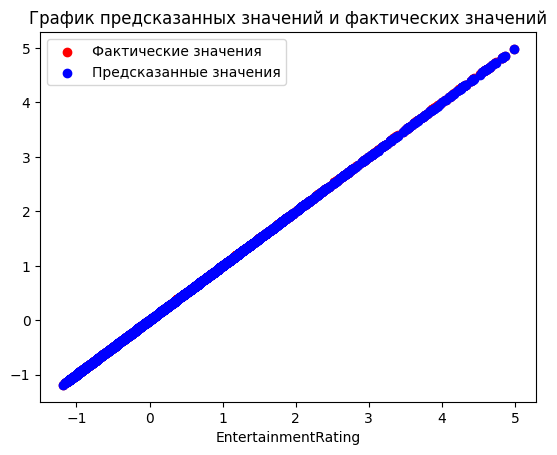

In [65]:
plt.scatter(X_test['ReviewLen'], y_test, color='red', label='Фактические значения')
plt.scatter(X_test['ReviewLen'], y_pred, color='blue', label='Предсказанные значения')

plt.xlabel('EntertainmentRating')

plt.title('График предсказанных значений и фактических значений')
plt.legend()
plt.show()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)


In [41]:
model = Ridge()

In [42]:
# Определение параметров для подбора
parameters = {'alpha': [0.001, 0.01, 0.1,1, 10, 100],
              'fit_intercept': [True, False],
              'copy_X': [True, False]}

In [43]:
# Подбор параметров с помощью GridSearchCV
grid_search = GridSearchCV(model, parameters, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False]},
             scoring='r2')

In [44]:
# Получение лучших параметров
best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

Лучшие параметры: {'alpha': 1, 'copy_X': True, 'fit_intercept': False}


In [45]:
# Обучение модели с лучшими параметрами
best_model = Ridge(**best_params)
best_model.fit(X_train, y_train)

Ridge(alpha=1, fit_intercept=False)

In [46]:
# Предсказание на тестовом наборе
y_pred = best_model.predict(X_test)

In [47]:
# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")
print(f"Средняя абсолютная ошибка (MAE): {mae}")
print(f"Объясненная дисперсия: {explained_var}")

Среднеквадратичная ошибка (MSE): 0.01241398280320544
Коэффициент детерминации (R^2): 0.9875771389303974
Средняя абсолютная ошибка (MAE): 0.08192237617756233
Объясненная дисперсия: 0.987579336973171


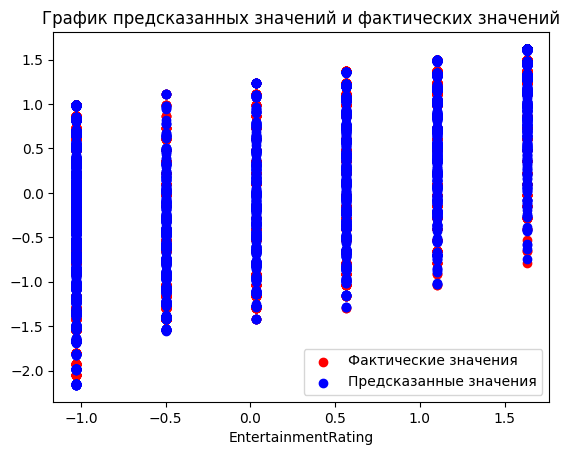

In [48]:
plt.scatter(X_test['ReviewLen'], y_test, color='red', label='Фактические значения')
plt.scatter(X_test['ReviewLen'], y_pred, color='blue', label='Предсказанные значения')

plt.xlabel('EntertainmentRating')

plt.title('График предсказанных значений и фактических значений')
plt.legend()
plt.show()